In [530]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [532]:
region1= pd.read_csv('geo_data_0.csv')
region2= pd.read_csv('geo_data_1.csv')
region3= pd.read_csv('geo_data_2.csv')

In [533]:
print('Info region 1')
region1.info()
print()
print('Numero de valores Duplicados')
region1.duplicated().sum()
print()
print('Numero de valores Ausentes')
region1.isnull().sum()

Info region 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Numero de valores Duplicados

Numero de valores Ausentes


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [534]:
print('Info region 1')
region1.info()
print()
print('Numero de valores Duplicados')
region1.duplicated().sum()
print()
print('Numero de valores Ausentes')
region1.isnull().sum()

Info region 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Numero de valores Duplicados

Numero de valores Ausentes


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [536]:
print('Info region 2')
region2.info()
print()
print('Numero de valores Duplicados')
region2.duplicated().sum()
print()
print('Numero de valores Ausentes')
region2.isnull().sum()

Info region 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Numero de valores Duplicados

Numero de valores Ausentes


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [539]:
print('Info region 3')
region3.info()
print()
print('Numero de valores Duplicados')
region3.duplicated().sum()
print()
print('Numero de valores Ausentes')
region3.isnull().sum()

Info region 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Numero de valores Duplicados

Numero de valores Ausentes


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [543]:
columnas =['f0', 'f1', 'f2', 'product']

Distribucion de las variables de la region 1



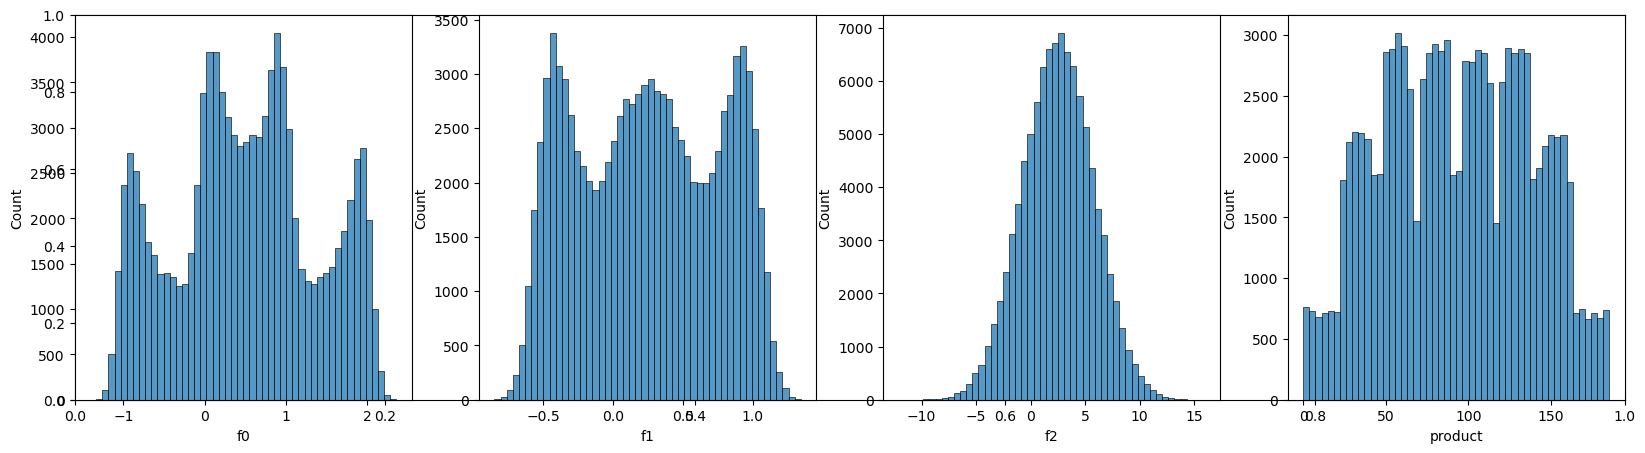

In [545]:
print('Distribucion de las variables de la region 1')
print()

plt.subplots(figsize=(20,5))

for indice, columna in enumerate(columnas):
   grafico = sns.histplot(data= region1, x=columna, bins= 50, ax=plt.subplot(1, len(columnas), indice+1))


plt.show()

Grafico de dispercion Region 1



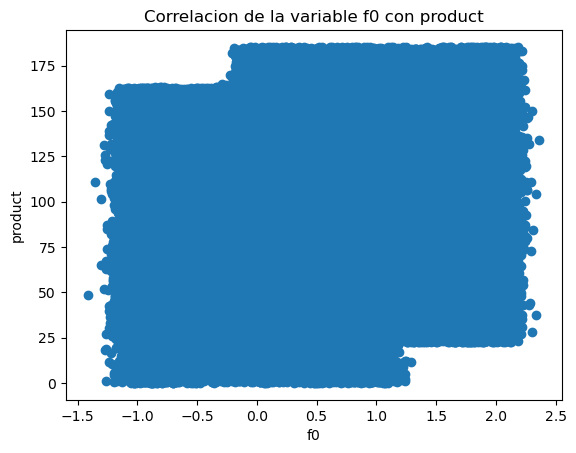

In [546]:
print('Grafico de dispercion Region 1')
print()
fig, ax=plt.subplots()
ax.scatter(region1['f0'], region1['product'])
plt.title('Correlacion de la variable f0 con product')
plt.xlabel('f0')
plt.ylabel('product')
plt.show()

Grafico de dispercion Region 1



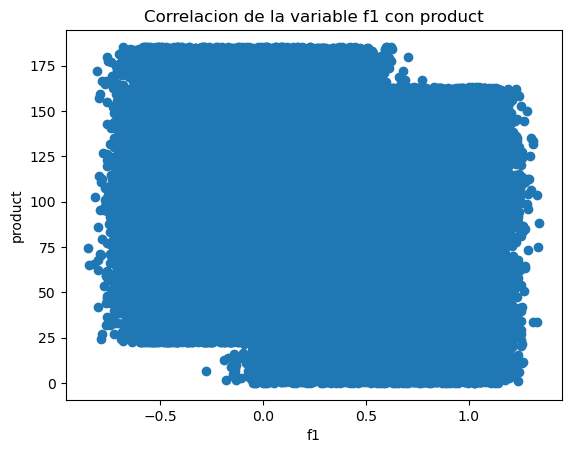

In [547]:
print('Grafico de dispercion Region 1')
print()
fig, ax=plt.subplots()
ax.scatter(region1['f1'], region1['product'])
plt.title('Correlacion de la variable f1 con product')
plt.xlabel('f1')
plt.ylabel('product')
plt.show()

Grafico de dispercion Region 1



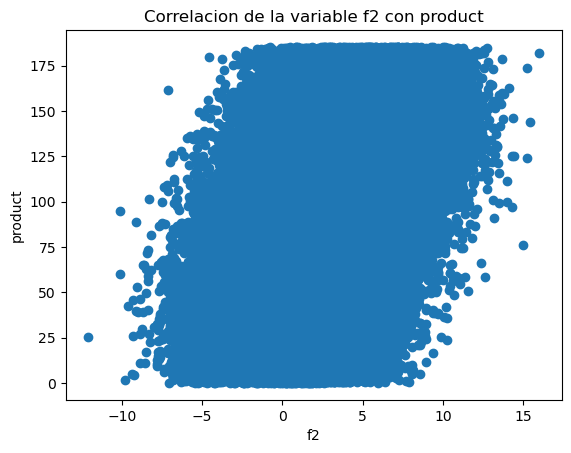

In [548]:
print('Grafico de dispercion Region 1')
print()
fig, ax=plt.subplots()
ax.scatter(region1['f2'], region1['product'])
plt.title('Correlacion de la variable f2 con product')
plt.xlabel('f2')
plt.ylabel('product')
plt.show()

In [549]:
region1.drop('id', axis=1).corr()  #corr para ver la correlacion 

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [550]:
estado = np.random.RandomState(54321)

In [552]:
def entrenamiento(datos, random=estado):
    caracteristicas=datos.drop(columns=['product', 'id'])
    meta = datos['product']

    caracteristicas_entrenamiento, caracteristicas_validacion, meta_entrenamiento, meta_validacion = train_test_split(caracteristicas, meta, test_size=0.25, random_state = random)
    
    rl = LinearRegression()
    
    rl.fit(caracteristicas_entrenamiento,meta_entrenamiento)

    predicciones = rl.predict(caracteristicas_validacion)

    rmse =  mean_squared_error(meta_validacion, predicciones, squared=False)

    volumen_promedio = predicciones.mean()

    print('RMSE', rmse)
    print('Volumen de barriles promedio', volumen_promedio)
    print("---------------------------------------")

    resultado = pd.DataFrame(dict(valor_prediccion=predicciones, valor_real=meta_validacion))
    return resultado

In [556]:
regiones = ['Region 1', 'Region 2', 'Region 3']

data = [region1, region2, region3]

In [558]:
prediccion_region = {}

In [565]:
for d1, region in zip(data, regiones):
    prediccion_region[region] = entrenamiento(d1)

RMSE 37.68341093860808
Volumen de barriles promedio 92.15921155743655
---------------------------------------
RMSE 0.8885222400411975
Volumen de barriles promedio 68.88432201515047
---------------------------------------
RMSE 40.136726733973994
Volumen de barriles promedio 95.17807449209
---------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [568]:
#Prueba de estres finanziero 
presupuesto = 100_000_000
income = 4500
pozos = 200

In [570]:
volumen_minimo = presupuesto/income

In [572]:
volumen_minimo_pozos = volumen_minimo/pozos

In [574]:
print('Volumen minimo:', volumen_minimo)

Volumen minimo: 22222.222222222223


In [576]:
print('Cada uno debe de tener:', volumen_minimo_pozos)

Cada uno debe de tener: 111.11111111111111


In [579]:
def beneficio(resultado_modelo):
    mejores_ubicaciones = resultado_modelo.sort_values(by='valor_prediccion', ascending= False)['valor_real'].head(200)

    volumen_mejores = mejores_ubicaciones.sum()
    
    benificio_mejores = ((volumen_mejores*income) - presupuesto)
    
    return benificio_mejores

In [581]:
print('El beneficio de las mejores ubicaciones de la Region 1 es: ', beneficio(prediccion_region['Region 1']))

El beneficio de las mejores ubicaciones de la Region 1 es:  31786315.95503962


In [583]:
print('El beneficio de las mejores ubicaciones de la Region 1 es: ', beneficio(prediccion_region['Region 2']))

El beneficio de las mejores ubicaciones de la Region 1 es:  24150866.966815114


In [585]:
print('El beneficio de las mejores ubicaciones de la Region 1 es: ', beneficio(prediccion_region['Region 3']))

El beneficio de las mejores ubicaciones de la Region 1 es:  24810535.044288725


In [588]:
def estres_beneficio(resultado_modelo, n_muestras=1000):
    beneficio_muestra = []

    for i in range(n_muestras):
        ubicaciones = resultado_modelo.sample(n=500, replace=True, random_state=estado)
        beneficio_muestra.append(beneficio(ubicaciones))

    beneficio_muestra = pd.Series(beneficio_muestra)
    return beneficio_muestra

In [610]:
beneficio_estresado_region_1 = estres_beneficio(prediccion_region['Region 1'])

In [611]:
beneficio_estresado_region_2 = estres_beneficio(prediccion_region['Region 2'])

In [612]:
beneficio_estresado_region_3 = estres_beneficio(prediccion_region['Region 3'])

In [620]:
def metricas(beneficios, region):
    n_confianza = 0.99
    
    alpha = 1 - n_confianza
    
    intervalo_min = beneficios.quantile(alpha/2)
    
    intervalo_max = beneficios.quantile(1-alpha/2)
    
    prom_benefi = beneficios.mean()
    
    perdida = (beneficios<0).mean()
    
    print(f'Mi intervalo de confianza al {n_confianza} tiene un rango de {intervalo_min} a {intervalo_max}')
    print(f'El marge bruto promedio de la region {region} es de {prom_benefi}')
    print(f'El % riesgo o perdida  de {region} es de {perdida}%')


In [624]:
metricas(beneficio_estresado_region_1, 'Region 1')

Mi intervalo de confianza al 0.99 tiene un rango de -3239515.407606547 a 11214828.510029688
El marge bruto promedio de la region Region 1 es de 3726711.398939536
El % riesgo o perdida  de Region 1 es de 0.097%


In [626]:
for region, datos in prediccion_region.items():
    beneficio_estresados = estres_beneficio(datos)
    metricas(beneficio_estresados, region)
    print()
    print()

Mi intervalo de confianza al 0.99 tiene un rango de -2941321.5661665807 a 9893524.268832106
El marge bruto promedio de la region Region 1 es de 3815036.461101462
El % riesgo o perdida  de Region 1 es de 0.065%


Mi intervalo de confianza al 0.99 tiene un rango de -1595099.4499443092 a 9229338.473633118
El marge bruto promedio de la region Region 2 es de 4260418.966699028
El % riesgo o perdida  de Region 2 es de 0.018%


Mi intervalo de confianza al 0.99 tiene un rango de -4155693.525696241 a 9889455.281634765
El marge bruto promedio de la region Region 3 es de 3091516.4040746763
El % riesgo o perdida  de Region 3 es de 0.134%




In [632]:
4260418.966699028 - 3815036.461101462

445382.50559756625